In [19]:
import numpy as np
from sklearn.decomposition import PCA
import phate


def compute_PCA():
    snp_matrix = np.loadtxt("../input/ps2_pca.genotypes.tab")
    snp_matrix = np.transpose(snp_matrix)
    pca = PCA(n_components=2)
    snp_pca = pca.fit_transform(snp_matrix)
    np.savetxt("../output/ps2_pca.projection.txt", snp_pca, fmt='%.5f')
    

def compute_Phate():
    snp_matrix = np.loadtxt("../input/ps2_pca.genotypes.tab")
    snp_matrix = np.transpose(snp_matrix)
    phate_op = phate.PHATE(k=4, t=10, n_jobs=-2, verbose=False)
    snp_phate = phate_op.fit_transform(snp_matrix)
    np.savetxt("../output/ps2_phate.projection.txt", snp_phate, fmt='%.5f')


#compute_PCA()
compute_Phate()

Populating the interactive namespace from numpy and matplotlib


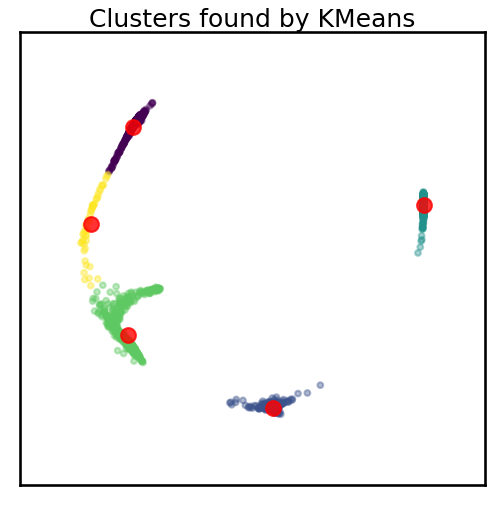

In [22]:
%pylab inline
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

snp_data = np.loadtxt("../output/ps2_phate.projection.txt")

kmeans = KMeans(n_clusters=5)
kmeans.fit(snp_data)
y_kmeans = kmeans.predict(snp_data)

fig = plt.figure(figsize=(8,8),dpi=75)
ax = fig.add_subplot(111)
ax.scatter(snp_data[:, 0], snp_data[:, 1], c=y_kmeans, s=30, alpha=0.4)
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.title('Clusters found by KMeans', fontsize=24)

fig.savefig("../output/kmeans_phate.png",bbox_inches='tight')

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Clusters found by GMM')

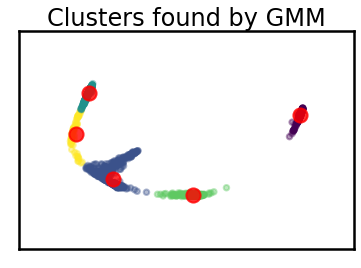

In [18]:
%pylab inline
from sklearn.mixture import GaussianMixture

snp_data = np.loadtxt("../output/ps2_phate.projection.txt")

gmm = GaussianMixture(n_components=5)
gmm.fit(snp_data)
y_gmm = gmm.predict(snp_data)

fig = plt.figure(figsize=(8,8),dpi=75)
ax = fig.add_subplot(111)
ax.scatter(snp_data[:, 0], snp_data[:, 1], c=y_gmm, s=30, alpha=0.4)
ax.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=200, alpha=0.8)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
plt.title('Clusters found by GMM', fontsize=24)

fig = plt.figure(figsize=(8,8),dpi=75)
ax = fig.add_subplot(111)
fig.savefig("../output/gmm_phate.png",bbox_inches='tight')

Populating the interactive namespace from numpy and matplotlib


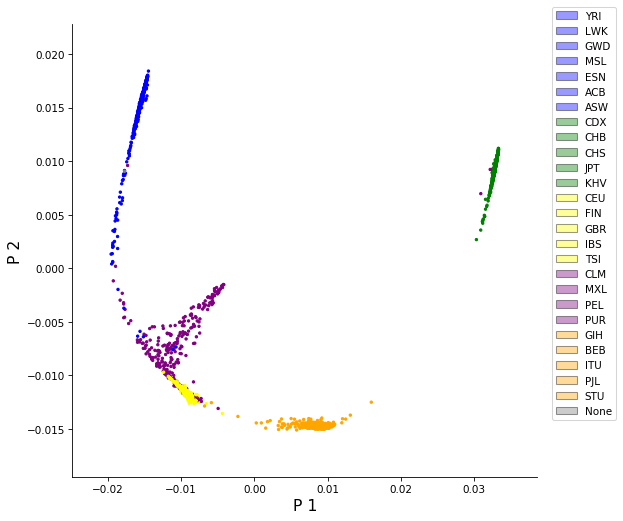

In [6]:
%pylab inline
import os
import matplotlib.patches as mpatches

sample_to_pop = {}
with open("../input/reference_labels.csv", "r") as f:
    for line in f:
        sample, pop = line.strip().split(",")
        sample_to_pop[sample] = pop

# Recommended colors for each population group
pop_to_color = {"YRI": "blue", "LWK": "blue", "GWD": "blue", 
                "MSL": "blue", "ESN": "blue", "ACB": "blue", "ASW": "blue",  
                "CDX": "green", "CHB": "green", "CHS": "green", "JPT": "green", "KHV": "green",
                "CEU": "yellow", "FIN": "yellow", "GBR": "yellow", "IBS": "yellow", "TSI": "yellow",
                "CLM": "purple", "MXL": "purple", "PEL": "purple", "PUR": "purple",
                "GIH": "orange", "BEB": "orange", "ITU": "orange", "PJL": "orange", "STU": "orange",
                "None": "gray"    
               }

samples = [item.strip() for item in open(os.path.join("../input/", "samples.txt"), "r").readlines()]
colors = []
for sample in samples:
    pop = sample_to_pop.get(sample, "None")
    color = pop_to_color[pop]
    colors.append(color)
    
snp_data = np.loadtxt("../output/ps2_phate.projection.txt")
snp_data = np.transpose(snp_data)
p1 = snp_data[0]
p2 = snp_data[1]

fig = plt.figure(figsize=(8,8),dpi=75)
ax = fig.add_subplot(111)
ax.scatter(p1, p2, color=colors, s=5)
ax.set_xlabel("P 1", size=15)
ax.set_ylabel("P 2", size=15)
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);
leg_el = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 0.4) for key, value in pop_to_color.items()]

ax.legend(handles = leg_el,loc='upper center', bbox_to_anchor=(1.10, 1.05))
ax.get_xaxis().tick_bottom();
ax.get_yaxis().tick_left();